In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    return pd.read_csv(file)

def exercise_1(df):
    return list(df)

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(n=k)

def exercise_4(df):
    return df['type'].unique()

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

def exercise_6(df):
    return df[df['isFraud'] == 1]

def exercise_7(df):
    df1 = df.groupby('nameOrig')['nameDest'].agg(['nunique'])
    df1.sort_values(by=('nunique'), ascending=False, inplace=True)
    return df1

In [2]:
df = exercise_0('transactions.csv')

In [3]:
# Test exercises here
exercise_1(df)
exercise_2(df, 5)
exercise_3(df, 5)
exercise_4(df)
exercise_5(df)
exercise_6(df)
print('done!')

done!


'While the transaction frequencies depend on the whims of the available data, what is interesting here is that fraudulent activity is only seen on CASH_OUT and TRANSFER transactions. This insight inform management to focus the effort of manual reviews which could result in less fraud being missed.'

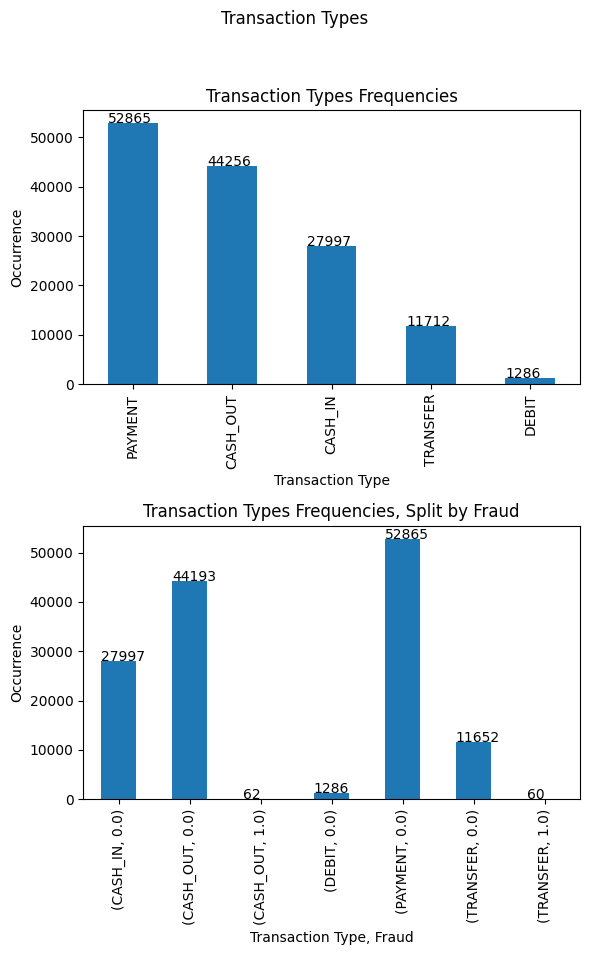

In [4]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction Types Frequencies')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Occurrence')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction Types Frequencies, Split by Fraud')
    axs[1].set_xlabel('Transaction Type, Fraud')
    axs[1].set_ylabel('Occurrence')
    fig.suptitle('Transaction Types')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'While the transaction frequencies depend on the whims of the ' \
           'available data, what is interesting here is that fraudulent ' \
           'activity is only seen on CASH_OUT and TRANSFER transactions. '\
           'This insight inform management to focus the effort of manual '\
           'reviews which could result in less fraud being missed.'

visual_1(df)

'A cash out occurs when a partipant withdraws money. It is reassuring that only two of the four quadrants have activity, as the contrary would indicate something wrong with the dataset. The y=-x line is particularly interesting as it indicates instant settlement.'

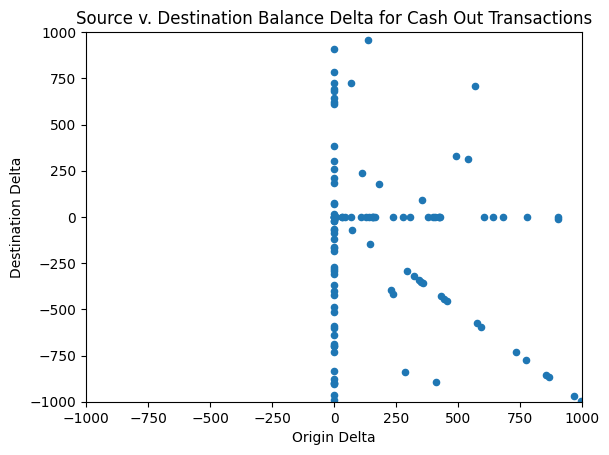

In [5]:
def visual_2(df):
    def query(df):
        df['Origin Delta'] = df['oldbalanceOrg'] -	df['newbalanceOrig']
        df['Destination Delta'] = df['oldbalanceDest'] -	df['newbalanceDest']
        return df[df['type']=='CASH_OUT']
    plot = query(df).plot.scatter(x='Origin Delta',y='Destination Delta')
    plot.set_title('Source v. Destination Balance Delta for Cash Out Transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'A cash out occurs when a partipant withdraws money. It is reassuring '\
           'that only two of the four quadrants have activity, as the contrary '\
           'would indicate something wrong with the dataset. The y=-x line is '\
           'particularly interesting as it indicates instant settlement.'

visual_2(df)

'Here we see that the fraud detection at play misses almost all of the fradulent activity. However, there are no false negatives either. One interpretation could be that the detector does not report until it has a high degree of confidence.'

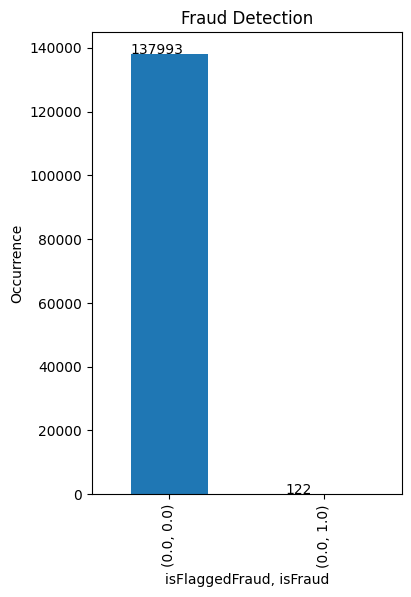

In [6]:
def exercise_custom(df):
    return df[['isFlaggedFraud', 'isFraud']].value_counts()
    
def visual_custom(df):
    fig, ax = plt.subplots(1, figsize=(4,6))
    exercise_custom(df).plot(ax=ax, kind='bar')
    ax.set_title('Fraud Detection')
    ax.set_xlabel('isFlaggedFraud, isFraud')
    ax.set_ylabel('Occurrence')
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()))

    return "Here we see that the fraud detection at play misses almost all "\
           "of the fradulent activity. However, there are no false negatives "\
           "either. One interpretation could be that the detector does not "\
           "report until it has a high degree of confidence."

visual_custom(df)